# Salary Prediction Model without UI

importing **Pandas** and reading Salary_Data.csv to Salary_data_org

In [47]:
import pandas as pd
path= r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Practice\Salary Prediction\Salary_Data.csv'
salary_data_org= pd.read_csv(path)

# Data Cleaning

Droping the missing values

In [48]:
salary_data_org= salary_data_org.dropna()

Making a Age to work ration in new Dataframe **Salary_Data**
,it will be the clean DataFrame

In [49]:
salary_data= pd.DataFrame()
salary_data['age and work']= salary_data_org['Age']/ salary_data_org['Years of Experience']

One Hot Endcoing the Education Level

In [50]:
salary_data['education_level']= salary_data_org['Education Level']
salary_data['education_level']= salary_data['education_level'].astype(str)

salary_data['education_level']= salary_data['education_level'].replace({
    "Bachelor's": "bachelor",
    "Bachelor's Degree": "bachelor",
    "Master's": "master",
    "Master's Degree": "master",
    "Phd": "phd",
    "phD": "phd"
                                              })


# salary_data['education_level']= salary_data['education_level'].apply(lambda x:1 if x == 'phd' else 0).astype(str)
# salary_data['education_level']= salary_data['education_level'].apply(lambda x:1 if x == 'master' else 0).astype(str)
# salary_data['education_level']= salary_data['education_level'].apply(lambda x:1 if x == 'bachelor' else 0).astype(str)

eduction_ohe= pd.get_dummies(salary_data['education_level'])
salary_data= pd.concat([salary_data,eduction_ohe],axis=1)
salary_data=salary_data.drop('education_level',axis=1)

One hot encoding Job Title and Gender

In [51]:

jobs_list=[salary_data_org['Job Title'].unique]
gender_list= [salary_data_org['Gender'].unique]
ohe_col= ['Job Title','Gender']
jobs_gender_df= pd.get_dummies(salary_data_org[ohe_col])

salary_data= pd.concat([salary_data, jobs_gender_df], axis=1)

In [52]:
file_path = r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Practice\Salary Prediction\job_list.txt'
with open(file_path, 'w') as f:
    for job_title in jobs_list:
        f.write(str(job_title) + '\n')


Adding Salary column to salary_data

In [53]:
salary_data['salary']= salary_data_org['Salary']

Droping Flot infinty

In [54]:
salary_data = salary_data.drop(salary_data[salary_data['age and work'] == float('inf')].index)
salary_data

,age and work,High School,PhD,bachelor,master,phd,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,...,Job Title_Training Specialist,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer,Gender_Female,Gender_Male,Gender_Other,salary
0,6.400000,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,90000.0
1,9.333333,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,65000.0
2,3.000000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,150000.0
3,5.142857,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,60000.0
4,2.600000,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,200000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6699,2.450000,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,200000.0
6700,10.666667,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,50000.0
6701,7.500000,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,55000.0
6702,3.285714,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,140000.0


Applying MinMaxScaler to Salary and age to work Ratio

In [55]:

from sklearn.preprocessing import MinMaxScaler



# Assuming you have a DataFrame named salary_data

# Select the columns to be scaled
cols = ['age and work', 'salary']

# Create a new DataFrame with only the selected columns
cols_to_scale = salary_data[cols]

# Instantiate the MinMaxScaler
mms = MinMaxScaler()

# Scale the selected columns
scaled_data = pd.DataFrame(mms.fit_transform(cols_to_scale), columns=cols)

salary_data = salary_data.drop(['age and work', 'salary'], axis=1)

salary_data=pd.concat([salary_data, scaled_data],axis=1)

In [56]:
salary_data

,High School,PhD,bachelor,master,phd,Job Title_Account Manager,Job Title_Accountant,Job Title_Administrative Assistant,Job Title_Back end Developer,Job Title_Business Analyst,...,Job Title_UX Designer,Job Title_UX Researcher,Job Title_VP of Finance,Job Title_VP of Operations,Job Title_Web Developer,Gender_Female,Gender_Male,Gender_Other,age and work,salary
0,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,0.106347,0.359103
1,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,0.172543,0.258963
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,0.029619,0.599439
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,0.077977,0.238935
4,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,0.020592,0.799720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.289140,0.158822
6226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041928,0.439215
6240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480959,0.138794
6254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.480959,0.138794


Dropping Empty columns once-again

In [57]:
salary_data= salary_data.dropna()

converting salary data to float

In [58]:
salary_data= salary_data.astype(float)

# Making the Model

Spliting The Data

In [59]:
from sklearn.model_selection import train_test_split

X= salary_data.drop('salary', axis=1)
y= salary_data['salary']
X_train, X_val, y_train, y_val= train_test_split(X,y, test_size=0.2, train_size=0.8)

importing Libraries

In [60]:
import tensorflow as tf
from tensorflow import keras
from keras import layers


Defining the Neural Net

In [61]:
model= keras.Sequential([
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(50, input_shape=(200,), activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(50, activation= 'relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation= 'relu'),
])

Compiling the model

In [62]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

Callback


In [63]:
from keras.callbacks import EarlyStopping
stopper= EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

Training the model

In [64]:
history_model= model.fit(X_train, y_train, 
                   epochs=100,
                   callbacks= [stopper],
                   batch_size= 512,
                   validation_data= (X_val, y_val),
                   verbose=0)

In [65]:
type(history_model)

keras.callbacks.History

0.07528393715620041


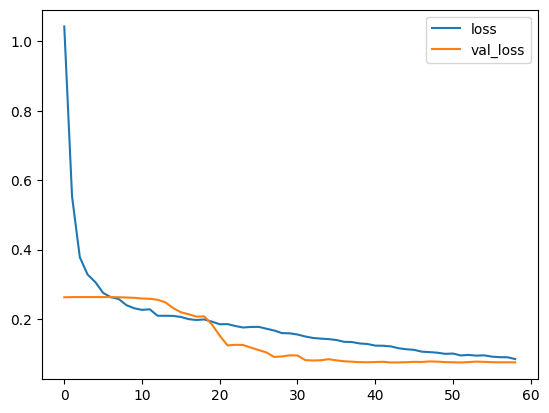

In [66]:
history_df= pd.DataFrame(history_model.history)

history_df.loc[:,['loss', 'val_loss']].plot()
print(history_df['val_loss'].min())

Saving the Model

In [67]:
model.save(filepath=r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Practice\Salary Prediction\Model_Save\Salary_Model_Save.h5')

Copying the X_train so I can use it in Interactive version

In [68]:
# Copying the columns to create a new empty DataFrame
UI_df = X_train.copy()
UI_df.drop(UI_df.index, inplace=True)  # Clearing the rows in the new DataFrame
UI_df.to_csv(r'C:\Users\shreyansh verma\Documents\Work\VS Code Projects\Machine Learning\Practice\Salary Prediction\UI_df.csv')
# Now you can let users enter their values into the new DataFrame
